## Building regression models for boston dataset

### Import Libraries

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

### Load Boston dataset

In [37]:
boston = datasets.load_boston()

### Exploring the data

In [38]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [39]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [40]:
boston.data.shape

(506, 13)

In [41]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [42]:
bostondf = pd.DataFrame(boston.data)
bostondf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
bostondf.columns = boston.feature_names

In [44]:
bostondf['PRICE']=boston.target

In [45]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Splitting data into train and test

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(379, 13) (127, 13)


### LinearRegression with default hyperparameters

#### Fit a model on train

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# no coef_ before fit()
lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [49]:
lr.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print(lr.intercept_)

38.15710086861394


In [51]:
print(lr.coef_)

[-9.77989795e-02  3.48169394e-02 -1.62271160e-02  3.36400909e+00
 -1.61858951e+01  3.56478301e+00  4.63566628e-03 -1.39638426e+00
  3.15813151e-01 -1.20424195e-02 -1.04955909e+00  1.15421153e-02
 -5.53387328e-01]


#### Create df of coefficien

In [52]:
coefficients = pd.DataFrame(lr.coef_, index = boston.feature_names, columns = ['Coefficients'])
coefficients

,Coefficients
CRIM,-0.097799
ZN,0.034817
INDUS,-0.016227
CHAS,3.364009
NOX,-16.185895
RM,3.564783
AGE,0.004636
DIS,-1.396384
RAD,0.315813
TAX,-0.012042


#### Print the model score (R^2) on train and test

In [53]:
print('train R^2', lr.score(Xtrain, ytrain))
print('test R^2', lr.score(Xtest, ytest))

train R^2 0.7341329235475398
test R^2 0.7501225866833338


#### Predict on test, print MAE and MSE on test

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [55]:
ytest_pred = lr.predict(Xtest)

In [56]:
print("Mean absolute error", mean_absolute_error(ytest, ytest_pred))
print("Mean square error", mean_squared_error(ytest, ytest_pred))

Mean absolute error 3.242464985017836
Mean square error 22.176975053590812


#### Plot test predictions

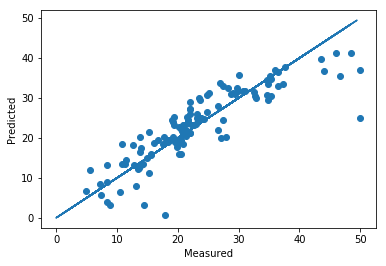

In [57]:
plt.scatter(ytest, ytest_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')

rng = np.random.RandomState(1)
x = 50 * rng.rand(100)
y=x
plt.plot(x, y);

### LinearRegression with normalization

In [58]:
lrn = LinearRegression(normalize = True)
lrn.fit(Xtrain, ytrain)
print('train R^2', lrn.score(Xtrain, ytrain))
print('test R^2', lrn.score(Xtest, ytest))

train R^2 0.7341329235475398
test R^2 0.750122586683334


### LinearRegression with PolynomialFeatures (n=2)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lrp2 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
lrp2.fit(Xtrain, ytrain)
print('train R^2', lrp2.score(Xtrain, ytrain))
print('test R^2', lrp2.score(Xtest, ytest))

train R^2 0.9450445006634632
test R^2 0.8109127677734395


In [60]:
lrp2.named_steps['linearregression'].coef_.shape

(105,)

### Explanation of polynomial features

<b>Method PolynomialFeatures() generates polynomial and interaction features.</b>

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. <b>For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].</b>

In [61]:
Xtrain.shape

(379, 13)

In [62]:
poly = PolynomialFeatures(2)
tXtrain = poly.fit_transform(Xtrain)
tXtrain.shape

(379, 105)

### LinearRegression with PolynomialFeatures (n=3)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 1.0
test R^2 -2394.6834311607718


### For Ridge and Lasso try different alpha

### Ridge with PolynomialFeatures (n=2)

In [64]:
from sklearn.linear_model import Ridge
poly = make_pipeline(PolynomialFeatures(2),
                           Ridge(alpha=0.1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.9405465290274718
test R^2 0.8437105164976592


In [114]:
poly = make_pipeline(PolynomialFeatures(2),
                           Ridge(alpha=1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.9359627038862061
test R^2 0.8482857767022403


In [115]:
poly = make_pipeline(PolynomialFeatures(2),
                           Ridge(alpha=10))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.9273347611452338
test R^2 0.8670913334257937


In [116]:
poly = make_pipeline(PolynomialFeatures(2),
                           Ridge(alpha=100))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.9125386363762065
test R^2 0.862892450084972


### Lasso with PolynomialFeatures (n=2)

In [117]:
from sklearn.linear_model import Lasso
poly = make_pipeline(PolynomialFeatures(2),
                           Lasso(alpha=0.1, tol=0.1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.8356379074019398
test R^2 0.8088330394285764


In [118]:
poly = make_pipeline(PolynomialFeatures(2),
                           Lasso(alpha=1, tol=0.1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.8442279564776213
test R^2 0.8334796159342872


In [120]:
poly = make_pipeline(PolynomialFeatures(2),
                           Lasso(alpha=10, tol=0.1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.8396402048770618
test R^2 0.8277364191354001


In [122]:
poly = make_pipeline(PolynomialFeatures(2),
                           Lasso(alpha=100, tol=0.1))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.7682236027112259
test R^2 0.7885754048499144
